### Collaborative filtering
The **Collaborative filtering method** for recommender systems is a method that helps in new recommendations based on the past interactions that have been recorded between users and items.

### Task
The dataset contains a set of 129 restaurants, with each of them serving a unique cuisine in their own style.
In this notebook, we will be exploring and analysing the ratings given by customers to each of these restaurants.




### Dataset Details

**place_id**: A unique 6-digit code given to each restaurant.

**name**: Name of the restaurant.

**user_id**: A unique 4-digit id given to each customer.

**rating**: Ratings given by the customer to the restaurant, with values [0,1,2].

**price**: Affordability of the restaurant, with values [high, medium, low]

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.metrics.pairwise import cosine_similarity

In [23]:
ratings=pd.read_csv("ratings.csv")

In [24]:
#Perform basic EDA like(.shape, .head, .info) before starting the worksheet.
ratings.head()

,Unnamed: 0,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,zip,accessibility,price,Rambience,franchise,area,other_services,userID,rating
0,0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1093,2
1,1,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1066,1
2,2,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1040,1
3,3,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1110,2
4,4,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,72300,no_accessibility,medium,familiar,f,closed,none,1121,2


In [25]:
ratings.info

<bound method DataFrame.info of       Unnamed: 0  placeID   latitude   longitude  \
0              0   134999  18.915421  -99.184871   
1              1   134999  18.915421  -99.184871   
2              2   134999  18.915421  -99.184871   
3              3   134999  18.915421  -99.184871   
4              4   134999  18.915421  -99.184871   
...          ...      ...        ...         ...   
1152        1156   135019  18.875011  -99.159422   
1153        1157   132877  22.135364 -100.934948   
1154        1158   132877  22.135364 -100.934948   
1155        1159   132877  22.135364 -100.934948   
1156        1160   132877  22.135364 -100.934948   

                                         the_geom_meter  \
0     0101000020957F000088568DE356715AC138C0A525FC46...   
1     0101000020957F000088568DE356715AC138C0A525FC46...   
2     0101000020957F000088568DE356715AC138C0A525FC46...   
3     0101000020957F000088568DE356715AC138C0A525FC46...   
4     0101000020957F000088568DE356715AC138C0A525

In [26]:
df=ratings

# Problem 1

1. Create a heatmap to visualise the correlation between the number of ratings and the average ratings of each place.
2. What do you infer from this obtained heatmap?

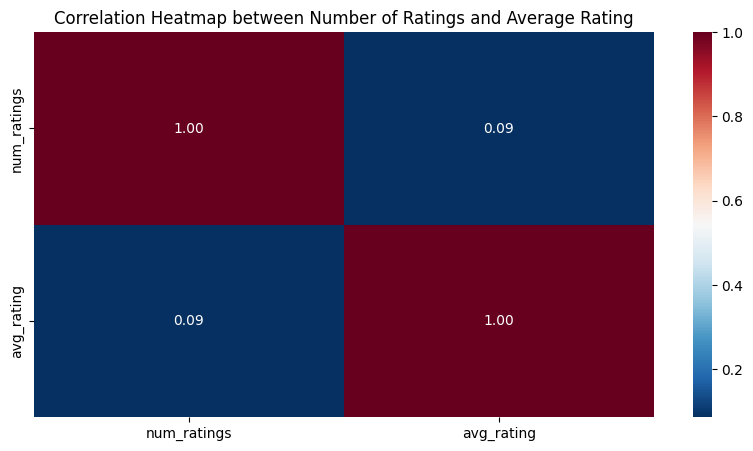

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by item ID (placeID) and calculate the number of ratings and average rating for each item
item_ratings = df.groupby('placeID').agg({'rating': ['count', 'mean']})

# Rename the columns
item_ratings.columns = ['num_ratings', 'avg_rating']

# Create a pivot table showing the correlation between the number of ratings and average rating for each place
pivot = item_ratings.corr()

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='RdBu_r', annot=True, fmt=".2f")
plt.title('Correlation Heatmap between Number of Ratings and Average Rating')
plt.show()

In [28]:
# We See that num_ratings and avg_rating have very less correlation.

# Problem 2

**User-based Filtering**

1.   Complete the calc_corr() function to find the correlation between restaurants.
2.   Recommend 15 restaurants that the customers of the restaurant `La Posada del Virrey` are expected to like.

Hints:


1.   Perform Matrix Factorization using `pivot_table` function (Note: Matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices).
2.   Complete the defined calc_corr() function using the inbuilt `corr_with` function.
3. Using the calc_corr recommend the top-15 restaurants.





In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer

# Step 1: Create a user-item interaction matrix (pivot table)
user_item_matrix = pd.pivot_table(df, values='rating', index='userID', columns='name')

imputer = SimpleImputer(strategy='mean')
user_item_matrix_imputed = imputer.fit_transform(user_item_matrix)

# Perform Matrix Factorization
num_factors = 15
svd = TruncatedSVD(n_components=num_factors)
item_factors = svd.fit_transform(user_item_matrix_imputed)

predicted_ratings = np.dot(item_factors, svd.components_)

itemratings = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)

itemratings.head()


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0.540220,0.996075,1.527206,1.109359,0.993622,1.264567,1.426362,0.242690,0.717634,0.773689,...,1.629644,1.494796,1.158124,0.728825,0.488967,0.577202,0.988122,1.723983,1.321704,0.860851
1002,0.536256,0.996792,1.460247,1.013788,0.992179,1.050163,1.431378,0.246378,0.727208,0.798981,...,1.831619,1.486678,1.266292,0.736253,0.493232,0.587228,0.986628,1.729577,1.319170,0.854653
1003,0.491255,0.998216,1.905588,0.872249,1.023916,1.203099,1.493463,0.253846,0.762028,0.784350,...,2.085469,1.602477,1.049691,0.731573,0.512410,0.611831,1.021909,1.772291,1.363611,0.880282
1004,0.493681,0.992802,1.415128,1.303670,1.004292,1.755926,1.432442,0.245750,0.731196,0.814309,...,1.253704,1.496649,1.121847,0.753287,0.497198,0.589215,0.999147,1.694301,1.335831,0.867997
1005,0.509740,0.996827,1.440486,0.947706,0.998040,2.032929,1.436878,0.245050,0.730057,0.790803,...,1.255359,1.496771,1.130500,0.755770,0.492804,0.584794,0.995124,1.656479,1.329214,0.861869


In [30]:
import pandas as pd

def calc_corr(df_rest, rest_name):
    # Calculate the correlation of the restaurant (rest_name) with all others
    similar_to_rest = df_rest.corrwith(df_rest[rest_name], axis=1)
    
    corr_df = pd.DataFrame(similar_to_rest, columns=['Correlation'])
    
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    
    return corr_df


In [31]:
rest_name = 'La Posada del Virrey'

# Calculate the correlation between 'La Posada del Virrey' and all other restaurants
corr_with_rest = itemratings.corrwith(itemratings[rest_name])

corr_df = pd.DataFrame(corr_with_rest, columns=['Correlation'])

corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Display the top 15 correlated restaurants (excluding 'La Posada del Virrey' itself)
top_15_correlated = corr_df.index[1:16]
print("Top 15 correlated restaurants with", rest_name, ":\n", top_15_correlated)

Top 15 correlated restaurants with La Posada del Virrey :
 Index(['VIPS', 'dairy queen', 'Restaurante El Cielo Potosino', 'la parroquia',
       'Restaurante Versalles', 'Gorditas Doa Gloria',
       'Restaurant Oriental Express', 'crudalia',
       'Restaurante de Mariscos la Langosta',
       'Restaurante El Chivero S.A. de C.V.', 'La Cantina Restaurante',
       'los Toneles', 'Luna Cafe', 'Cafe Chaires',
       'Restaurant de Mariscos de Picon'],
      dtype='object', name='name')


In [32]:
top_15_correlated_restaurants = corr_df.index[1:16]
correlation_values = corr_df['Correlation'].head(15)

correlated_restaurants_df = pd.DataFrame({'Restaurant Name': top_15_correlated_restaurants, 'Correlation': correlation_values})

print("Top 15 Correlated Restaurants with La Posada del Virrey:")
print(correlated_restaurants_df)


Top 15 Correlated Restaurants with La Posada del Virrey:
                                                         Restaurant Name  \
name                                                                       
La Posada del Virrey                                                VIPS   
VIPS                                                         dairy queen   
dairy queen                                Restaurante El Cielo Potosino   
Restaurante El Cielo Potosino                               la parroquia   
la parroquia                                       Restaurante Versalles   
Restaurante Versalles                                Gorditas Doa Gloria   
Gorditas Doa Gloria                          Restaurant Oriental Express   
Restaurant Oriental Express                                     crudalia   
crudalia                             Restaurante de Mariscos la Langosta   
Restaurante de Mariscos la Langosta  Restaurante El Chivero S.A. de C.V.   
Restaurante El Chivero S.A. de 

# Problem 3

**Item-based filtering**

1.  Calculate the cosine similarity between restaurants to measure their similarity.
2.  Use item-based filtering to recommend upto 5 restaurants to users based on their previous ratings.

HINTS:
*   From the above created pivot_table make use of `cosine similarity` function available in the sklearn library and measure the similarity.

*   Create a function `recommend_restaurants` that takes a user ID and recommends restaurants based on their past ratings and the similarity between restaurants.



In [33]:
# Create a user-restaurant rating matrix
# same as above just replaced nan with zeros.

# WRITE YOUR CODE (Hint: use pivot_table())
user_restaurant_ratings = itemratings.fillna(0)
user_restaurant_ratings.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0.540220,0.996075,1.527206,1.109359,0.993622,1.264567,1.426362,0.242690,0.717634,0.773689,...,1.629644,1.494796,1.158124,0.728825,0.488967,0.577202,0.988122,1.723983,1.321704,0.860851
1002,0.536256,0.996792,1.460247,1.013788,0.992179,1.050163,1.431378,0.246378,0.727208,0.798981,...,1.831619,1.486678,1.266292,0.736253,0.493232,0.587228,0.986628,1.729577,1.319170,0.854653
1003,0.491255,0.998216,1.905588,0.872249,1.023916,1.203099,1.493463,0.253846,0.762028,0.784350,...,2.085469,1.602477,1.049691,0.731573,0.512410,0.611831,1.021909,1.772291,1.363611,0.880282
1004,0.493681,0.992802,1.415128,1.303670,1.004292,1.755926,1.432442,0.245750,0.731196,0.814309,...,1.253704,1.496649,1.121847,0.753287,0.497198,0.589215,0.999147,1.694301,1.335831,0.867997
1005,0.509740,0.996827,1.440486,0.947706,0.998040,2.032929,1.436878,0.245050,0.730057,0.790803,...,1.255359,1.496771,1.130500,0.755770,0.492804,0.584794,0.995124,1.656479,1.329214,0.861869


In [34]:

# Calculate the cosine similarity between restaurants
# WRITE YOUR CODE: (Hint: use cosine_similarity())
# Calculate cosine similarity between restaurants
restaurant_similarity = cosine_similarity(user_restaurant_ratings.T)

restaurant_similarity_df = pd.DataFrame(restaurant_similarity, index=user_restaurant_ratings.columns, columns=user_restaurant_ratings.columns)

def recommend_restaurants(userID, num_recommendations=5):
    user_ratings = user_restaurant_ratings.loc[userID].values.reshape(1, -1)
    cosine_similarities = cosine_similarity(user_ratings, restaurant_similarity_df).flatten()
    similar_restaurants = pd.Series(cosine_similarities, index=user_restaurant_ratings.columns)
    recommended_restaurants = similar_restaurants.sort_values(ascending=False).head(num_recommendations)
    return recommended_restaurants

In [35]:
user_id = 1093
recommended_restaurants = recommend_restaurants(user_id,num_recommendations=5)
print(recommended_restaurants)

name
Tortas Locas Hipocampo          0.956909
puesto de tacos                 0.956895
Restaurant Oriental Express     0.956824
Restaurant Familiar El Chino    0.956807
McDonalds Centro                0.956806
dtype: float64


# Problem 4

a. For the above restaurant recommendation system, how would you design a hybrid approach that leverages both user-based and item-based collaborative filtering?

b. Do you see any potential challenges or trade-offs associated with implementing such a hybrid recommendation system for restaurants?

In [36]:
#a)Combine the recommendations from both user-based and item-based approaches using an appropriate weighting scheme. For example, you can assign different weights to each approach based on their relative performance.
#You can also experiment with blending the recommendations from both approaches, such as taking the intersection or union of the top N recommendations from each approach.

In [37]:
#b) Data Quality
#Scalability
#ColdStartProblem
#Weights and Parameters

More information on [hybrid recommendation systems](https://medium.com/grabngoinfo/hybrid-recommendation-system-using-user-based-and-item-based-collaborative-filtering-c5e8283cd2dc#:~:text=In%20a%20switching%20hybrid%20method,one%20approach%20over%20the%20other.)

****